# Case 1. Coronary Heart Disease
Name: Dmytro Izotov<br>
Last edited: xx.02.2019<br>
Cognitive Systems for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

## 1. Objectives

With the use of provided [DATA](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/) from UCI archives, create and train a dense neural network to predict to classify the presense of heart disease.  

## 2. Required libraries

In [463]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import warnings

from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from numpy import argmax, zeros
from keras.utils import to_categorical
from keras import models, layers
from keras.models import Sequential

## 3. Data description and preprocessing

In [464]:
#Function which gather all the data together [FINISH THIS ONE!!!]
url = r'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, sep = ',', header = None, index_col = None,na_values = '?')
df4= pd.read_csv(url, sep = ',', header = None, index_col = None,na_values = '?')
df.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [465]:
#Adding columns name, filling missing values with means and checking the general state of data
name_list = ['age', 'sex', 'cp','trestbps', 'chol', 'fbs','restecg',
             'thalac','exang','oldpeak','slope','ca','thal','num']
df.columns = name_list
df = df.fillna(df.median())
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [466]:
#According to the above values, it should be good to normalize them first before further processing
#Shuffle the data to be sure that its more randomized, then separate labels from it
df = shuffle(df)
data_list = ['age', 'sex', 'cp','trestbps', 'chol', 'fbs','restecg',
             'thalac','exang','oldpeak','slope','ca','thal']
data = df[data_list]
labels = df['num']


X_normalized = normalize(data, norm='l2')
data_min = data.min()
data_max = data.max()
data_norm = (data - data_min)/(data_max - data_min)
data_norm.describe()



,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.529978,0.679868,0.719472,0.355564,0.275555,0.148515,0.495050,0.600055,0.326733,0.167678,0.300330,0.221122,0.430693
std,0.188305,0.467299,0.320042,0.166035,0.118212,0.356198,0.497486,0.174618,0.469794,0.187270,0.308113,0.311458,0.484596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.666667,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.562500,1.000000,0.666667,0.339623,0.262557,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.000000
75%,0.666667,1.000000,1.000000,0.433962,0.340183,0.000000,1.000000,0.725191,1.000000,0.258065,0.500000,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Histogram of labels')

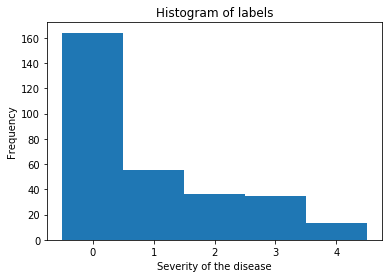

In [467]:
# Plot the histogram of the labels (severity of the disease), here it is possible to see the first problem - data is 
# not equally divided between the labels  
plt.hist(labels, bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5])
plt.xlabel('Severity of the disease')
plt.ylabel('Frequency')
plt.title('Histogram of labels')


In [468]:
#Our labels have 4 different options and keras really likes binary output, so lets convert them to binaries 
one_hot_labels = to_categorical(labels)
one_hot_labels[:5]

array([[ 1.000,  0.000,  0.000,  0.000,  0.000],
       [ 0.000,  1.000,  0.000,  0.000,  0.000],
       [ 1.000,  0.000,  0.000,  0.000,  0.000],
       [ 0.000,  1.000,  0.000,  0.000,  0.000],
       [ 0.000,  1.000,  0.000,  0.000,  0.000]], dtype=float32)

In [469]:
# Split the data and labels into training and validation sets
train_data = data_norm[:200]
val_data = data_norm[200:]

train_labels = one_hot_labels[:200]
val_labels = one_hot_labels[200:]

# Check the shapes of the data
print('Shape of')
print('  full data:        ', data_norm.shape)
print('  train data:       ',train_data.shape)
print('  validation data:  ',val_data.shape)
print('  one-hot-labels:   ', one_hot_labels.shape)
print('  train labels:     ',train_labels.shape)
print('  validation labels:',val_labels.shape)

Shape of
  full data:         (303, 13)
  train data:        (200, 13)
  validation data:   (103, 13)
  one-hot-labels:    (303, 5)
  train labels:      (200, 5)
  validation labels: (103, 5)


## 4. Modeling and compilation




In [470]:
# Build the model
model = models.Sequential()
model.add(layers.Dense(9, activation='relu', input_shape=(13,)))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

# Compile the model
model.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 9)                 126       
_________________________________________________________________
dense_36 (Dense)             (None, 5)                 50        
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________


## 5. Training and Validation

In [471]:
# Fit the model with the data and keep record on elapsed time
t_start = time.time()
history = model.fit(train_data, train_labels, 
                    epochs = 100, 
                    batch_size = 16, 
                    verbose = 0,
                    validation_data = (val_data, val_labels))
t_end = time.time()
print('Elapsed time: {:.2f} seconds'.format(t_end - t_start))

Elapsed time: 3.88 seconds


In [472]:
# Get the training data
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

## 6. Evaluation

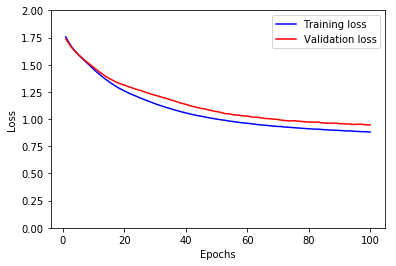

In [473]:
# Visualize the training process: loss function
plt.figure()
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend()
plt.show()

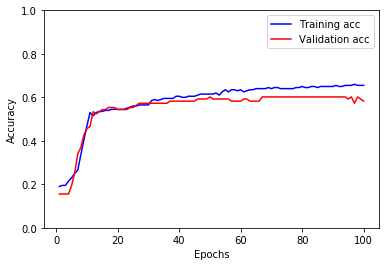

In [474]:
# Visualize the accuracy
plt.figure()
plt.plot(epochs, acc_values, 'b', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [475]:
# Print total accuracy and confusion matrix
val_predicts = model.predict(data_norm)
y_pred = argmax(val_predicts, axis = 1)

# Best guess = Guess that all are normal
simple_guess = zeros(len(y_pred))
cm0 = confusion_matrix(labels, simple_guess)
#Transpose the matrix if you want real values be in x-axis
#cm0 = np.transpose(cm0)
true0 = np.trace(cm0)
N = len(labels)
acc0 = true0/N
print('Simple guess accuracy: {:.4f}'.format(acc0))
print('Confusion matrix:')
print(cm0)

# Our model results
print(' ')
cm1 = confusion_matrix(labels, y_pred)
#cm1 = transpose(cm1)
true1 = np.trace(cm1)
N = len(labels)
acc1 = true1/N
print('Total accuracy: {:.4f}'.format(acc1))
print('Confusion matrix:')
print(cm1)

Simple guess accuracy: 0.5413
Confusion matrix:
[[164   0   0   0   0]
 [ 55   0   0   0   0]
 [ 36   0   0   0   0]
 [ 35   0   0   0   0]
 [ 13   0   0   0   0]]
 
Total accuracy: 0.6304
Confusion matrix:
[[156   5   1   2   0]
 [ 30  13   0  12   0]
 [  8   9   3  16   0]
 [  6   8   2  19   0]
 [  2   5   0   6   0]]


## 7. Results

In [476]:
# Calculate precision, recall, fscore and support
# Suppress warnings as the f-score is zero
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    p, r, f, s = precision_recall_fscore_support(labels, y_pred)

# Print precision, recall, fscore and support  
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print('Support:\n', s)
print('Precision:', p)
print('Recall:   ', r)
print('F-score:  ', f)

Support:
 [164  55  36  35  13]
Precision: [ 0.772  0.325  0.500  0.345  0.000]
Recall:    [ 0.951  0.236  0.083  0.543  0.000]
F-score:   [ 0.852  0.274  0.143  0.422  0.000]


## 8. Attempt to achieve better results and Discussion

In [477]:
#First, lets try to improve perfomance with the additional data
#Using additional 3 datasets
url1 = r'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
df1 = pd.read_csv(url1, sep = ',', header = None, index_col = None,na_values = '?')

url2 = r'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
df2 = pd.read_csv(url2, sep = ',', header = None, index_col = None,na_values = '?')

url3 = r'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data'
df3 = pd.read_csv(url3, sep = ',', header = None, index_col = None,na_values = '?')

#Adding them together + columns names
df_concated = pd.concat([df4, df1, df2, df3], ignore_index=True)

df_concated.columns = name_list

df_concated.describe()


#Lets compare described information below of both dataframes 

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [478]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [479]:
# Columns number 11 and 12 has a serious lack of data in the new dataset, we need to do something with it.
# After I tried to fill missing data with columnwise median values, it cause a huge difference in mean value of 
# column 11 in comparison to first dataframe, every other columns were fine. I decided to take a mean from the first df
# and use it in the new concated dataframe

median = df["ca"].mean()
df_concated["ca"] = df_concated["ca"].fillna(median)

In [480]:
# Going throught the mins and maxs helped to find another two problems: min value of cholesterol in concated table is 0
# which is not possible and min value of oldpeak is -2.6. Need to fix that
for c in df_concated["chol"]:
    print(c)  

233.0
286.0
229.0
250.0
204.0
236.0
268.0
354.0
254.0
203.0
192.0
294.0
256.0
263.0
199.0
168.0
229.0
239.0
275.0
266.0
211.0
283.0
284.0
224.0
206.0
219.0
340.0
226.0
247.0
167.0
239.0
230.0
335.0
234.0
233.0
226.0
177.0
276.0
353.0
243.0
225.0
199.0
302.0
212.0
330.0
230.0
175.0
243.0
417.0
197.0
198.0
177.0
290.0
219.0
253.0
266.0
233.0
172.0
273.0
213.0
305.0
177.0
216.0
304.0
188.0
282.0
185.0
232.0
326.0
231.0
269.0
254.0
267.0
248.0
197.0
360.0
258.0
308.0
245.0
270.0
208.0
264.0
321.0
274.0
325.0
235.0
257.0
216.0
234.0
256.0
302.0
164.0
231.0
141.0
252.0
255.0
239.0
258.0
201.0
222.0
260.0
182.0
303.0
265.0
188.0
309.0
177.0
229.0
260.0
219.0
307.0
249.0
186.0
341.0
263.0
203.0
211.0
183.0
330.0
254.0
256.0
407.0
222.0
217.0
282.0
234.0
288.0
239.0
220.0
209.0
258.0
227.0
204.0
261.0
213.0
250.0
174.0
281.0
198.0
245.0
221.0
288.0
205.0
309.0
240.0
243.0
289.0
250.0
308.0
318.0
298.0
265.0
564.0
289.0
246.0
322.0
299.0
300.0
293.0
277.0
197.0
304.0
214.0
248.0
255.0
207.0
223.

In [481]:
# Seems like some columns of chol table have values of 0, lets substitute them with means 
# of with average value of the column exluding 0 values
counter=0
sum=0
for c in df_concated["chol"]:
    if (c==0):
        counter=counter+1
  
for b in df_concated["chol"]:
    sum=sum+b

new_mean = sum/(len(df_concated["chol"])-counter)
df_concated.loc[df_concated.chol == 0,'chol'] = new_mean
for c in df_concated["chol"]:
    print(c)  


233.0
286.0
229.0
250.0
204.0
236.0
268.0
354.0
254.0
203.0
192.0
294.0
256.0
263.0
199.0
168.0
229.0
239.0
275.0
266.0
211.0
283.0
284.0
224.0
206.0
219.0
340.0
226.0
247.0
167.0
239.0
230.0
335.0
234.0
233.0
226.0
177.0
276.0
353.0
243.0
225.0
199.0
302.0
212.0
330.0
230.0
175.0
243.0
417.0
197.0
198.0
177.0
290.0
219.0
253.0
266.0
233.0
172.0
273.0
213.0
305.0
177.0
216.0
304.0
188.0
282.0
185.0
232.0
326.0
231.0
269.0
254.0
267.0
248.0
197.0
360.0
258.0
308.0
245.0
270.0
208.0
264.0
321.0
274.0
325.0
235.0
257.0
216.0
234.0
256.0
302.0
164.0
231.0
141.0
252.0
255.0
239.0
258.0
201.0
222.0
260.0
182.0
303.0
265.0
188.0
309.0
177.0
229.0
260.0
219.0
307.0
249.0
186.0
341.0
263.0
203.0
211.0
183.0
330.0
254.0
256.0
407.0
222.0
217.0
282.0
234.0
288.0
239.0
220.0
209.0
258.0
227.0
204.0
261.0
213.0
250.0
174.0
281.0
198.0
245.0
221.0
288.0
205.0
309.0
240.0
243.0
289.0
250.0
308.0
318.0
298.0
265.0
564.0
289.0
246.0
322.0
299.0
300.0
293.0
277.0
197.0
304.0
214.0
248.0
255.0
207.0
223.

In [482]:
# Looks good, now lets take a look at oldpeak values. 
for c in df_concated["oldpeak"]:
    print(c)  

2.3
1.5
2.6
3.5
1.4
0.8
3.6
0.6
1.4
3.1
0.4
1.3
0.6
0.0
0.5
1.6
1.0
1.2
0.2
0.6
1.8
1.0
1.8
3.2
2.4
1.6
0.0
2.6
1.5
2.0
1.8
1.4
0.0
0.5
0.4
0.0
2.5
0.6
1.2
1.0
1.0
1.4
0.4
1.6
0.0
2.5
0.6
2.6
0.8
1.2
0.0
0.4
0.0
0.0
1.4
2.2
0.6
0.0
0.5
1.4
1.2
1.4
2.2
0.0
1.4
2.8
3.0
1.6
3.4
3.6
0.8
0.2
1.8
0.6
0.0
0.8
2.8
1.5
0.2
0.8
3.0
0.4
0.0
1.6
0.2
0.0
0.0
0.0
0.0
0.5
0.4
6.2
1.8
0.6
0.0
0.0
1.2
2.6
0.8
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.4
3.6
1.2
1.0
1.2
0.0
3.0
1.2
0.0
0.0
1.4
1.8
2.8
0.0
4.0
1.2
5.6
1.4
0.6
4.0
2.8
0.0
0.0
0.4
0.0
0.0
0.0
0.2
1.4
2.6
1.4
1.6
2.4
0.0
0.2
0.0
1.8
0.6
0.0
1.0
0.0
0.0
0.0
1.2
0.6
1.6
0.8
2.2
2.4
1.6
0.0
1.2
1.0
0.0
0.0
1.6
1.0
0.0
0.0
0.0
0.0
0.0
0.0
2.9
0.0
0.0
1.2
2.0
1.2
0.1
2.1
1.9
0.0
0.5
1.9
0.8
4.2
0.0
0.0
0.8
0.0
0.0
2.0
0.0
4.2
0.1
1.9
1.5
0.9
0.1
0.2
1.1
0.0
0.0
0.0
0.2
0.2
0.0
0.0
3.0
0.9
0.0
1.4
0.0
3.8
2.0
1.0
0.0
1.9
0.0
0.0
2.0
0.0
0.0
0.0
0.0
2.0
1.8
0.7
0.1
0.0
0.0
0.1
0.1
3.4
0.8
0.2
0.0
3.2
1.6
0.8
0.0
0.0
0.0
0.0
0.0
2.6
0.0
1.0
0.1
1.0
1.0
0.0


In [483]:
# Well, there are only few of negative ones, so lets just convert all them to zero
df_concated.loc[df_concated.oldpeak < 0,'oldpeak'] = 0
df_concated = df_concated.fillna(df_concated.median())
df_concated.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,3.250000,131.995652,245.222826,0.150000,0.603261,137.692391,0.366304,0.867065,1.847826,0.667736,5.569565,0.995652
std,9.424685,0.408148,0.930969,18.451300,51.785328,0.357266,0.805443,25.145235,0.482056,1.037004,0.516007,0.541702,1.393888,1.142693
min,28.000000,0.000000,1.000000,0.000000,85.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,217.750000,0.000000,0.000000,120.000000,0.000000,0.000000,2.000000,0.663366,6.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,239.500000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.663366,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,0.663366,6.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [484]:
# Here we could compare new dataframe to the very fisrt "perfect" set of data, looks fine. I got 3 times more data. 
# Not sure if that was a right idea from the beginning, but lets see 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Text(0.5, 1.0, 'Histogram of labels')

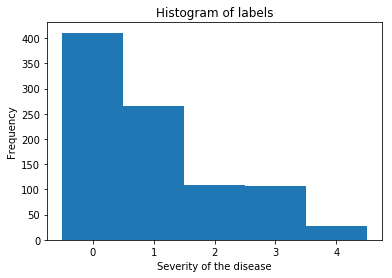

In [488]:
#Shufflig and separation on labels and data
df_concated = shuffle(df_concated)
data_concated = df_concated[data_list]
labels_concated = df_concated['num']

#Normalization
Y_normalized = normalize(data_concated, norm='l2')
data_min_concated = data_concated.min()
data_max_concated = data_concated.max()
data_norm_concated = (data_concated - data_min_concated)/(data_max_concated - data_min_concated)

#Lets check how histrogram of labels looks like (unfortunatelly severity of the disease type 4 didn't increase)
plt.hist(labels_concated, bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5])
plt.xlabel('Severity of the disease')
plt.ylabel('Frequency')
plt.title('Histogram of labels')

In [ ]:
#Lets split the data with 70/30 ratio (train/test)
one_hot_labels_concated = to_categorical(labels_concated)

train_data_concated = data_norm_concated[:640]
val_data_concated = data_norm_concated[640:]

train_labels_concated = one_hot_labels_concated[:640]
val_labels_concated = one_hot_labels_concated[640:]

print('Shape of')
print('  full data:        ', data_norm_concated.shape)
print('  train data:       ',train_data_concated.shape)
print('  validation data:  ',val_data_concated.shape)
print('  one-hot-labels:   ', one_hot_labels_concated.shape)
print('  train labels:     ',train_labels_concated.shape)
print('  validation labels:',val_labels_concated.shape)

In [495]:
new_model = models.Sequential()
new_model.add(layers.Dense(9, activation='relu', input_shape=(13,)))
new_model.add(layers.Dense(5, activation='softmax'))
new_model.summary()

# Compile the model
new_model.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 9)                 126       
_________________________________________________________________
dense_38 (Dense)             (None, 5)                 50        
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________


In [503]:
# Start the training
t_start = time.time()
history = model.fit(train_data_concated, train_labels_concated, 
                    epochs = 300, 
                    batch_size = 16, 
                    verbose = 0,
                    validation_data = (val_data_concated, val_labels_concated))
t_end = time.time()
print('Elapsed time: {:.2f} seconds'.format(t_end - t_start))

Elapsed time: 22.00 seconds


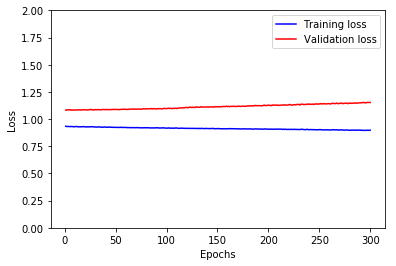

In [504]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

plt.figure()
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend()
plt.show()

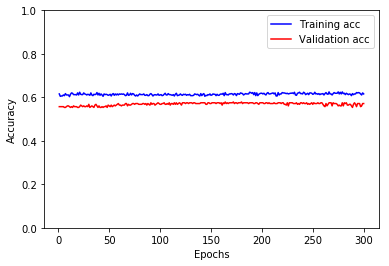

In [505]:
plt.figure()
plt.plot(epochs, acc_values, 'b', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

## 9. Conclusions

Shape of
  full data:         (920, 13)
  train data:        (640, 13)
  validation data:   (280, 13)
  one-hot-labels:    (920, 5)
  train labels:      (640, 5)
  validation labels: (280, 5)
